In [76]:
from statistics import mean
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller
import statistics

In [77]:
# 1
# Create a function that calculates the correlation coefficent of x and y variables
def correlation_coefficent_cal(dat1,dat2,x,y):
    # calculate cross_variance between x and y
    # convert list data into numpy arrays
    dat1_mean = np.array(dat1).mean()
    print("mean of " + str(x) +":",dat1_mean)
    dat2_mean = np.array(dat2).mean()
    print("mean of " + str(y) + ":",dat2_mean)
    cross_v = sum((dat1 - dat1_mean)*(dat2-dat2_mean))
    print("Cross variance:", cross_v)
    dat1_sd = np.sqrt(sum(np.square(dat1 - dat1_mean)))
    print("standard devation of " + str(x) + ":",dat1_sd)
    dat2_sd = np.sqrt(sum(np.square(dat2 - dat2_mean)))
    print("standard devation of "+ str(y) + ":",dat2_sd)
    r = cross_v/(dat1_sd * dat2_sd)
    print("The correlation coefficent between " + str(x) + " and " + str(y) + " is:",r)
    return r
    

In [78]:
# Create a function that takes the scatter plot of two variables
def scatter_plt(dat1,dat2,x,y,r):
    ax = plt.scatter(dat1,dat2)
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    plt.title("Scatter Plot of " + str(x) + " and " + str(y) + " with r = {}".format(r))
    plt.show()
    return ax
    

In [79]:
# 2
# Test correlation function on simple datasets
# Dummy variable lists
X = [1,2,3,4,5]
Y = [1,2,3,4,5]
Z = [-1,-2,-3,-4,-5]
G = [1,1,0,-1,-1,0,1]
H = [0,1,1,1,-1,-1,-1]

In [80]:
# A plot X and Y
# test correlation_coefficent function

r_xy = correlation_coefficent_cal(X,Y,"X","Y")

mean of X: 3.0
mean of Y: 3.0
Cross variance: 10.0
standard devation of X: 3.1622776601683795
standard devation of Y: 3.1622776601683795
The correlation coefficent between X and Y is: 0.9999999999999998


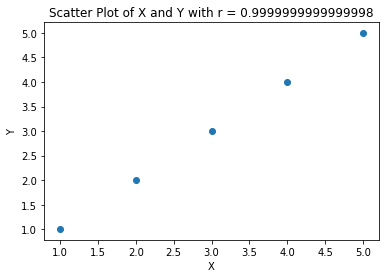

In [81]:
# Plot X and Y
xy_scatter = scatter_plt(X,Y,"X","Y",r_xy)

In [82]:
# The r value of 0.99999 for X and Y makes sense since X and Y have the exact same numbers.
# Having the exact same numbers would theoretically mean an r = 1, but that does not exisist in the real world.
# Hence why the calculation is just slightly under 1

In [83]:
# B
# test for r

r_xz = correlation_coefficent_cal(X,Z,"X","Z")

mean of X: 3.0
mean of Z: -3.0
Cross variance: -10.0
standard devation of X: 3.1622776601683795
standard devation of Z: 3.1622776601683795
The correlation coefficent between X and Z is: -0.9999999999999998


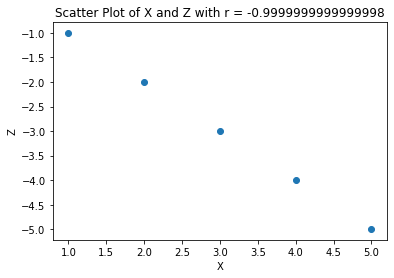

In [84]:
# Plot scatter plot between X, Z

xz_scatter = scatter_plt(X,Z,"X","Z",r_xz)

In [85]:
# The r value of -0.99999 for X and Z makes sense since X and Z have the exact same numbers, but Z is in the negative direction.
# Having the exact same magnitutes but with different difrections(negative vs positive) would theoretically mean an r = -1, but that does not exisist in the real world.
# Hence why the calculation is just slightly above -1

In [86]:
# C
# test for r

r_gh = correlation_coefficent_cal(G,H,"G","H")

mean of G: 0.14285714285714285
mean of H: 0.0
Cross variance: 0.0
standard devation of G: 2.2038926600773587
standard devation of H: 2.449489742783178
The correlation coefficent between G and H is: 0.0


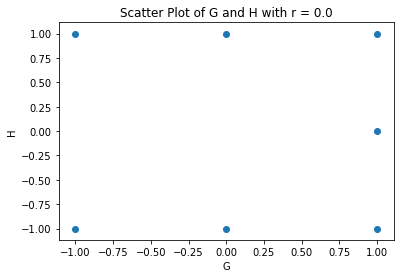

In [87]:
# Scatter plot for G and H
xz_scatter = scatter_plt(G,H,"G","H",r_gh)

In [88]:
# The r value of 0.0for G and H makes sense since G and H have no obvious positive or negative relationship.
# The cross variance between G and H of 0 mathamatically supports that r = 0, since 0 is the numerator in the equation.
# There is no clear LINEAR relationship between the two data sets

In [89]:
# All graphs x-axis and y-axis  with r values in title

In [90]:
# 3
# Load the dataset tute 1

#os.listdir()
df = pd.read_csv("tute1.csv")
#df

In [91]:
# 4
# Dataset relates to the quartlery sales for a small company over the period 1981 - 2005

In [92]:
# 5
# Sales contains quarterly sales, AdBudget is the advertisement budget, and GDP is the gross domestic product for a small company.

Text(0.5, 1.0, 'Features vs Quarter')

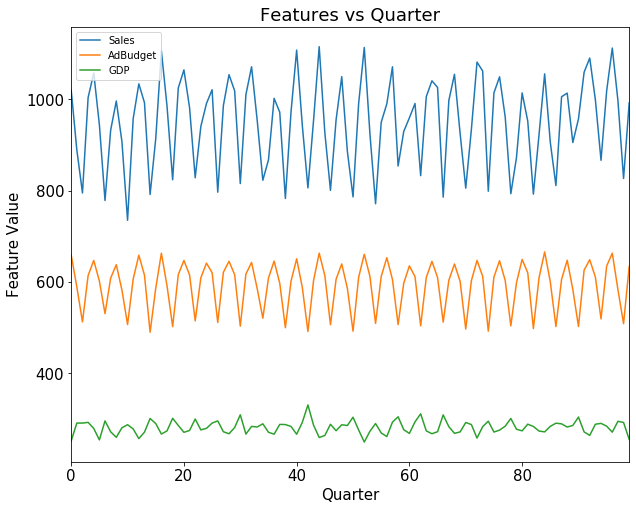

In [93]:
# 6
# Plot Sales, AdBudget, and GDP versus time-steps

ax = df[['Sales','AdBudget',"GDP"]].plot(kind='line',figsize=(10,8), fontsize=15)
plt.legend(loc='upper left', fontsize=10)
ax.set_xlabel('Quarter', fontsize=15)
ax.set_ylabel('Feature Value', fontsize=15)
ax.set_title('Features vs Quarter',fontsize=18)

In [99]:
# 7
# Graph scatter plot for Sales and GDP. Y = Sales, X = GDP. NO TITLE
# Create a function that takes the scatter plot of two variables
def scatter_plt_df(X,Y,x,y):
    ax = plt.scatter(X,Y)
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    #plt.title("Scatter Plot of " + str(x) + " and " + str(y) + " with r = {}".format(r))
    plt.show()
    return ax

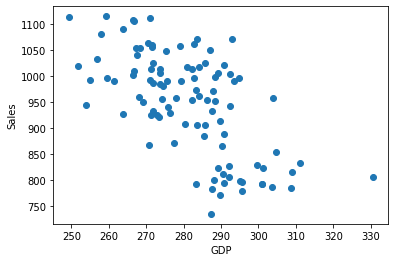

In [100]:
Sgdp = scatter_plt_df(df.GDP,df.Sales,"GDP","Sales")

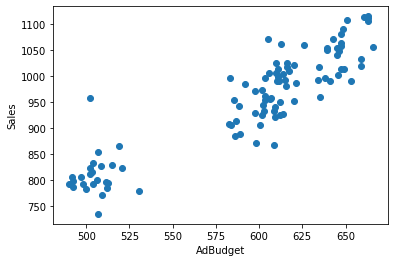

In [101]:
# 8
# Graph scatter plot for Sales and AdBudget. Y = Sales, X = GDP. NO TITLE
Sadb = scatter_plt_df(df.AdBudget,df.Sales,"AdBudget","Sales")

In [102]:
# 9
# Use the function correlation_coefficient_cal
# Y = Sales, X = GDP
r_xy = correlation_coefficent_cal(df.GDP,df.Sales,"GDP","Sales")

mean of GDP: 281.18300000000005
mean of Sales: 948.737
Cross variance: -88895.36710000003
standard devation of GDP: 142.98454846590943
standard devation of Sales: 977.596917497186
The correlation coefficent between GDP and Sales is: -0.6359605788635527


In [103]:
# Does the correlation coefficent make sense?
# Yes. There is a strong negative relationshp between Sales and GDP.
# The data is clustered but it is not very compact.

In [120]:
# 10
# Use the function correlation_coefficient_cal
# Y = Sales, Z = AdBudget
r_yz = correlation_coefficent_cal(df.AdBudget,df.Sales,"AdBudget","Sales")

mean of AdBudget: 591.933
mean of Sales: 948.737
Cross variance: 479833.3079
standard devation of AdBudget: 540.7006575731159
standard devation of Sales: 977.596917497186
The correlation coefficent between AdBudget and Sales is: 0.9077654938192307


In [105]:
# Does the correlation coefficent make sense?
# Yes. There is a very strong positive relationshp between Sales and AdBudget.
# The data is clustered and compact.

In [107]:
# 11
# incldue r_xy and r_yz in the title of the graphs
# new fucnction to include titels for this data
def scatter_plt_dft(X,Y,x,y,r):
    ax = plt.scatter(X,Y)
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    plt.title("Scatter Plot of " + str(x) + " and " + str(y) + " with r = {}".format(r))
    plt.show()
    return ax

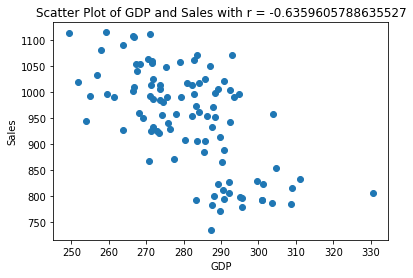

In [108]:
Sgdp = scatter_plt_dft(df.GDP,df.Sales,"GDP","Sales",r_xy)

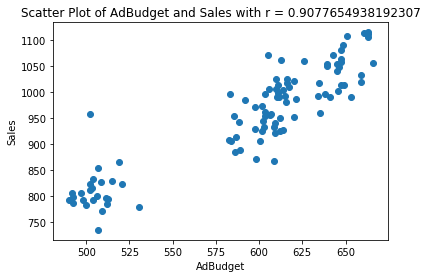

In [109]:
Sadb = scatter_plt_dft(df.AdBudget,df.Sales,"AdBudget","Sales",r_yz)

In [110]:
# 12
# Looking at the correlation coefficents, what effect does AdBudget and GDP have on Sales?

In [111]:
# 13
# Perform an ADF test.
# Plot the histogram of raw Sales data
# Plot the first order differnce sales data
# Plot the logorithmic transformation of sales data
# Which sales dataset is stationary?
# Justify using the ADF and histogram plot

In [112]:
# Create function to calculate ADF score of a dataset
def ADF_Cal(x):
    result = adfuller(x)
    print("ADF Statistic: %f" %result[0])
    print("p-value: %f" %result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print('\t%s: %3f' % (key,value))

In [113]:
sales_adf = ADF_Cal(df.Sales)

ADF Statistic: -3.262755
p-value: 0.016628
Critical Values:
	1%: -3.505190
	5%: -2.894232
	10%: -2.584210


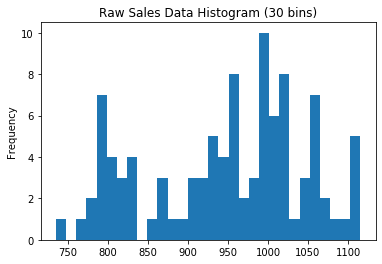

In [114]:
# Plot histogram of raw Sales data
df["Sales"].plot(kind='hist', bins=30,title = "Raw Sales Data Histogram (30 bins)")
plt.show()

In [115]:
# Find the first order difference of Sales
sales_raw = np.array(df.Sales)
print("Length of Sales Raw:",len(sales_raw))
# apply first order differncing
sales_diff = np.diff(df.Sales)
print("Length of Sales Difference:",len(sales_diff))
print("Input array  : ", sales_raw) 
print("First order difference  : ", sales_diff) 

Length of Sales Raw: 100
Length of Sales Difference: 99
Input array  :  [1020.2  889.2  795.  1003.9 1057.7  944.4  778.5  932.5  996.5  907.7
  735.1  958.1 1034.1  992.8  791.7  914.2 1106.5  985.1  823.9 1025.1
 1064.7  981.9  828.3  940.7  991.1 1021.2  796.7  986.6 1054.2 1018.7
  815.6 1010.6 1071.5  954.   822.9  867.5 1002.3  972.   782.9  972.8
 1108.   943.7  806.1  954.2 1115.5  927.1  800.7  955.7 1049.8  886.
  786.4  991.3 1113.9  924.5  771.4  949.8  990.5 1071.4  854.1  929.8
  959.6  991.1  832.9 1006.1 1040.7 1026.3  785.9  997.6 1055.   925.6
  805.6  934.1 1081.7 1062.3  798.8 1014.3 1049.5  961.7  793.4  872.3
 1014.2  952.6  792.4  922.3 1055.9  906.2  811.2 1005.8 1013.8  905.6
  957.3 1059.5 1090.6  998.9  866.6 1018.7 1112.5  997.4  826.8  992.6]
First order difference  :  [-131.   -94.2  208.9   53.8 -113.3 -165.9  154.    64.   -88.8 -172.6
  223.    76.   -41.3 -201.1  122.5  192.3 -121.4 -161.2  201.2   39.6
  -82.8 -153.6  112.4   50.4   30.1 -224.5  189.9

In [116]:
# Convert first order differencing array into a pandas dataframe
df_sales_diff = pd.DataFrame(sales_diff)
# Rename columns
df_sales_diff = df_sales_diff.rename(columns={0: "Sales"})

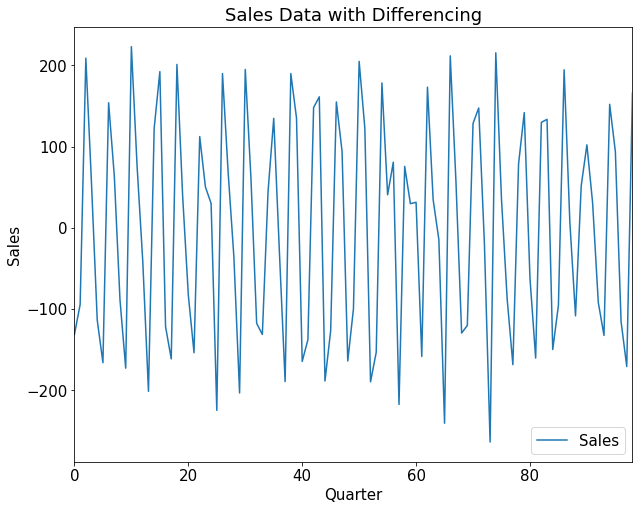

In [117]:
# Plot the first order differnce of Sales
ax = df_sales_diff.plot(kind='line',figsize=(10,8), fontsize=15)
plt.legend(loc='lower right', fontsize=15)
ax.set_xlabel('Quarter', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
ax.set_title('Sales Data with Differencing',fontsize=18)
plt.show()

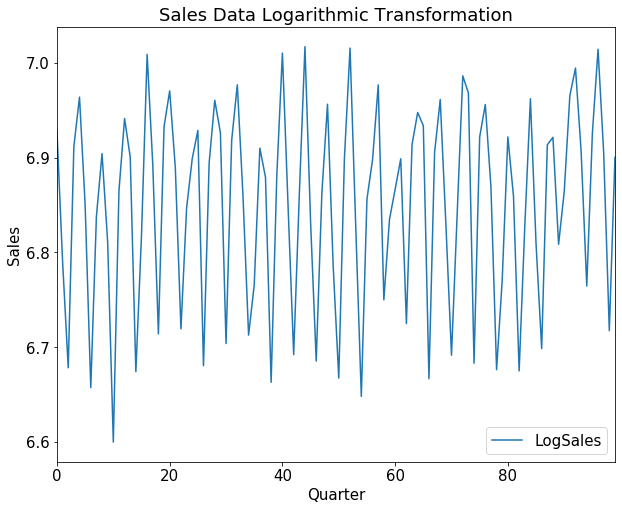

In [118]:
# Plot the logorithmic transformation of sales data
df["LogSales"] = np.log(df.Sales)

# Plot the logarithmic transformation
# Logoarithmic transformation removes any varrying variance
ax = df.LogSales.plot(kind='line',figsize=(10,8), fontsize=15)
plt.legend(loc='lower right', fontsize=15)
ax.set_xlabel('Quarter', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
ax.set_title('Sales Data Logarithmic Transformation',fontsize=18)
plt.show()

In [119]:
# Which sales dataset is stationary?
# Justify using the ADF and histogram plot